# Differensialligninger
__Creative Commons BY-SA : bitjungle (Rune Mathisen) og fuzzbin (Tom Jarle Christiansen)__

En differensialligning er en ligning der det inngår en ukjent funksjon og deriverte av denne. En differensialligning beskriver en sammenheng mellom en funksjon og endringer i funksjonen. I muntlig tale blir forkortningen «diffligning» ofte brukt. (Kilde: [Wikipedia](https://no.wikipedia.org/wiki/Differensialligning))

Differensialliknihger er mye brukt til å beskrive og løse praktiske problemstillinger.

La oss tenke oss en vanntank som inneholder 6000 liter med væske. Vi åpner en kran slik at det renner ut 30 liter væske per minutt.

Vi lar funksjonen $y$ (egentlig $y(t)$), være den mengde væske som til enhver tid er igjen på tanken. Vi åpner krana i bunnen av tanken ved $t=0\mathrm{s}$. I dette eksempelet forenkler vi fysikken, og sier at væsken renner ut med en konstant mengde på 30 liter per minutt.

Denne situsjanonen kan beskrives med en differensiallkining, og kan skrives slik:

$$ y'(t) = -30 $$

Likningen ovenfor viser hvordan størrelsen $y$ forandrer seg over tid, og kalles en differensiallikning.

Å løse en differensiallikning går ut på å finne et uttrykk for $y(t)$. For å klare dette, må vi i dette tilfellet integrere. Definisjonen av ubestemt integral gir oss følgende løsning:

$$ y = -30 $$
$$ y = \int -30 \ \mathrm{dt} $$
$$ y = -30t + C $$

Ved $t=0\mathrm{s}$ var væskemengden i tanken $y = 6000 \ \mathrm{liter}$. Det betyr at vi kan sette inn følgende [initialbetingelse](http://ndla.no/nb/node/133068):

$$ y = -30t + C $$
$$ 6000 = -30 \cdot 0 + C $$
$$ C = 6000 $$

Vi får da:

$$ y(t) = -30t + 6000 $$

Løsningen av differensiallikningen var en funksjon, en modell som beskriver væskemengden i tanken som funksjon av tiden. Å sette opp og løse differensiallikninger kalles derfor også for å modellere. Overalt innen vitenskap og samfunnsliv er vi ute etter å finne modeller som beskriver sammenhenger mellom størrelser. Modellering ved å løse differensiallikninger regnes derfor ofte som et av de viktigste områdene innenfor matematikkfaget.

For å løse differensiallikningen måtte vi integrere. Å løse differensiallikninger oppfattes av mange som den store praktiske anvendelsen av integrasjon, og derivasjon. (Kilde: [NDLA - R2](http://ndla.no/nb/node/119089?fag=98361))

Vi skal nå se på hvordan dette kan gjøres i Python. Fordelen med python (og flere andre programmeirngsspråk) er at det finnes ferdiglagede funksjoner som kan løse blant annet differensiallikninger for oss.

**
Koden nederst er lånt fra https://arachnoid.com/IPython/differential_equations.html 
**

**
Må skrives om for å passe til dette kurset. OBS (C)
Henter introtekst fra [NDLA-R2](http://ndla.no/nb/node/119089?fag=98361) og skriver om. (TJ)
**

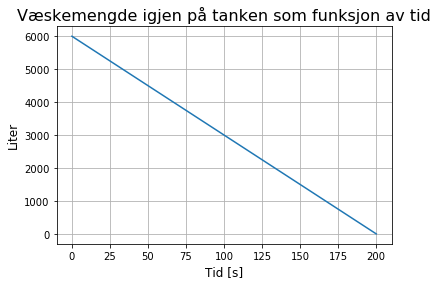

In [1]:
# Løsning av enkel difflikning
# Bruker scipy ODE-solver

import numpy as np
# import scipy as sp
from scipy.integrate import odeint # Funksjon for å løse difflikninger
import matplotlib.pyplot as plt

# Definerer funksjonen y'(t)
def dy_dt(y,t):
    return -30

xs = np.linspace(0,200,10) # x-verdier - Ti verdier mellom 0 og 200
y0 = 6000 # initialbetingelse y(0) = 6000 liter
y = odeint(dy_dt, y0, xs) # Løser difflikningen numerisk
y = np.array(y).flatten() # Formaterer resultatene i en array

plt.grid(True)
plt.title("Væskemengde igjen på tanken som funksjon av tid", fontsize=16)
plt.xlabel('Tid [s]',fontsize=12)
plt.ylabel('Liter',fontsize=12)
plt.plot(xs,y)
plt.show()


### Eksempel med flere parameter

Forrige eksempel var en forenklet modell av virkeligheten. Vi skal nå prøve å løse samme problem, men denne gangen tar vi med flere parameter slik at modellen stemmer bedre med virkelighelten. VI ta nå hensyn til størrelsen på hullet der væsken renner ut, og vi tar med gravitasjon.

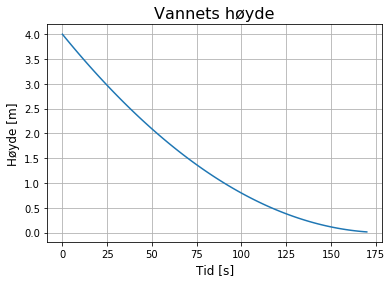

In [2]:
# Bruker SciPy ODE-solver

import math
import numpy as np
# import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definerer funksjonen y'(t)
def dh_dt(h,t):
    A_t = 2.00 # Tankens tverrsnittareal (m^2)
    A_h = 0.01 # Hullets tverrsnittareal (m^2)
    #h = 4.00 # Vannivået når forsøket starter (m)
    g = 9.81 # Gravitasjonskonstanten (m/s^2)
    k = math.sqrt(2*g)
    return -(A_h/A_t) * k * math.sqrt(h)

xs = np.linspace(0,170,100) # x-verdier
h0 = 4.0 # initialbetingelse h(0) = 4.0 meter
h = odeint(dh_dt, h0, xs) # Løser difflikningen
h = np.array(h).flatten() # Formaterer tallene i en array

plt.grid(True)
plt.title("Vannets høyde", fontsize=16)
plt.xlabel('Tid [s]',fontsize=12)
plt.ylabel('Høyde [m]',fontsize=12)
plt.plot(xs,h)
plt.show()

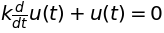

<IPython.core.display.Latex object>

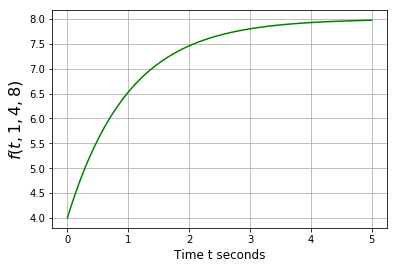

In [3]:
import numpy as np
from sympy import *
from IPython.display import *
import matplotlib.pyplot as plt
%matplotlib inline 
init_printing(use_latex=True)
var('a b t k C1')
u = Function("u")(t)
de = Eq(u+u.diff(t) * k)
display(de)
des = dsolve(de,u)
display(des)
des = des.subs(C1,0)
display(des)
f = Lambda((t,k,a,b),(a-b) * des.rhs + b)
display(Latex('$f(t,k,a,b) = ' + str(latex(f(t,k,a,b))) + '$'))
x = np.linspace(0,5,100)
plt.grid(True)
plt.xlabel('Time t seconds',fontsize=12)
plt.ylabel('$f(t,1,4,8)$',fontsize=16)
plt.plot(x,[f(t,1,4,8) for t in x],color='#008000')
plt.show()